### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [1]:
# load data
ny = read.csv('new-york-city.csv')
wa = read.csv('washington.csv')
chg = read.csv('chicago.csv')

In [2]:
# display new york data
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [3]:
# display washington data
head(wa)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [4]:
# display chicago data
head(chg)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


In [5]:
# load ggplot module
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


### Question 1


**Does trip duration go up as the months grow warmer?**

In [6]:
# extract the month from the Start.Time into its own column
ny$month <- format(as.Date(ny$Start.Time), '%m')
wa$month <- format(as.Date(wa$Start.Time), '%m')
chg$month <- format(as.Date(chg$Start.Time), '%m')

### New York City

In [7]:
# summary data for New York City trip duration by month
by(ny$Trip.Duration, ny$month, summary)

ny$month: 01
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    61.0    329.0    522.0    744.3    868.0 445732.0 
------------------------------------------------------------ 
ny$month: 02
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    61.0    344.0    552.0    787.3    939.0 332970.0 
------------------------------------------------------------ 
ny$month: 03
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    61.0    336.0    538.0    755.8    887.0 259153.0 
------------------------------------------------------------ 
ny$month: 04
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    61.0    379.8    646.0    955.4   1144.0 302506.0 
------------------------------------------------------------ 
ny$month: 05
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     61     385     645     925    1117  499410 
------------------------------------------------------------ 
ny$month: 06
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     61     392     660  

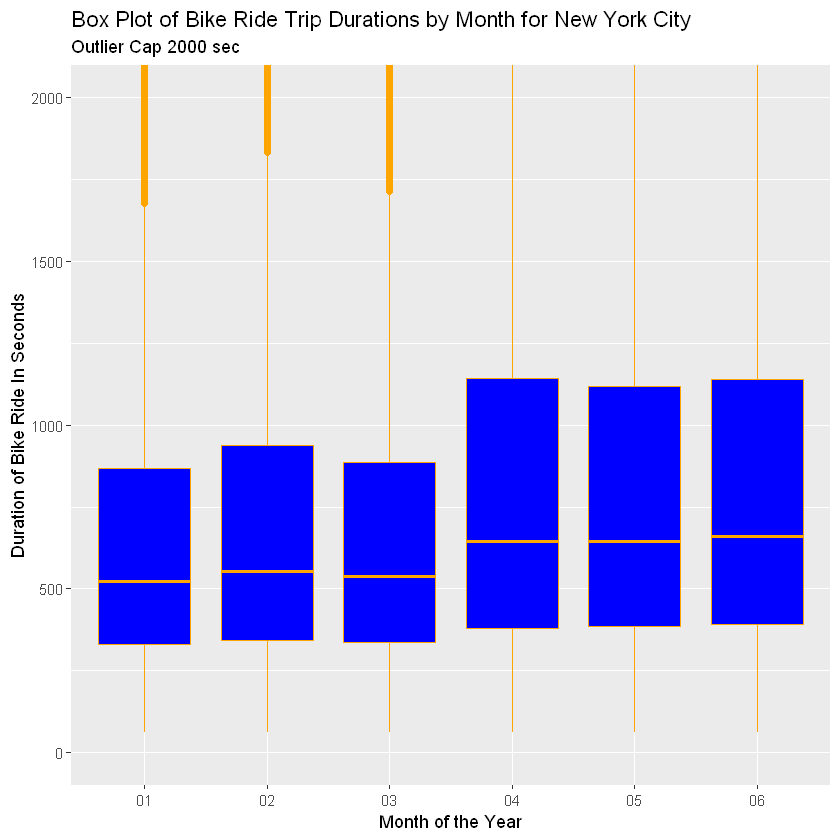

In [8]:
qplot(x = month,
      y = Trip.Duration,
      data = ny,
      geom = 'boxplot',
      xlab = 'Month of the Year',
      ylab = 'Duration of Bike Ride In Seconds',
      fill=I("blue"),
      col=I("orange")) +
     coord_cartesian(ylim = c(0,2000)) +
    ggtitle('Box Plot of Bike Ride Trip Durations by Month for New York City', 'Outlier Cap 2000 sec')

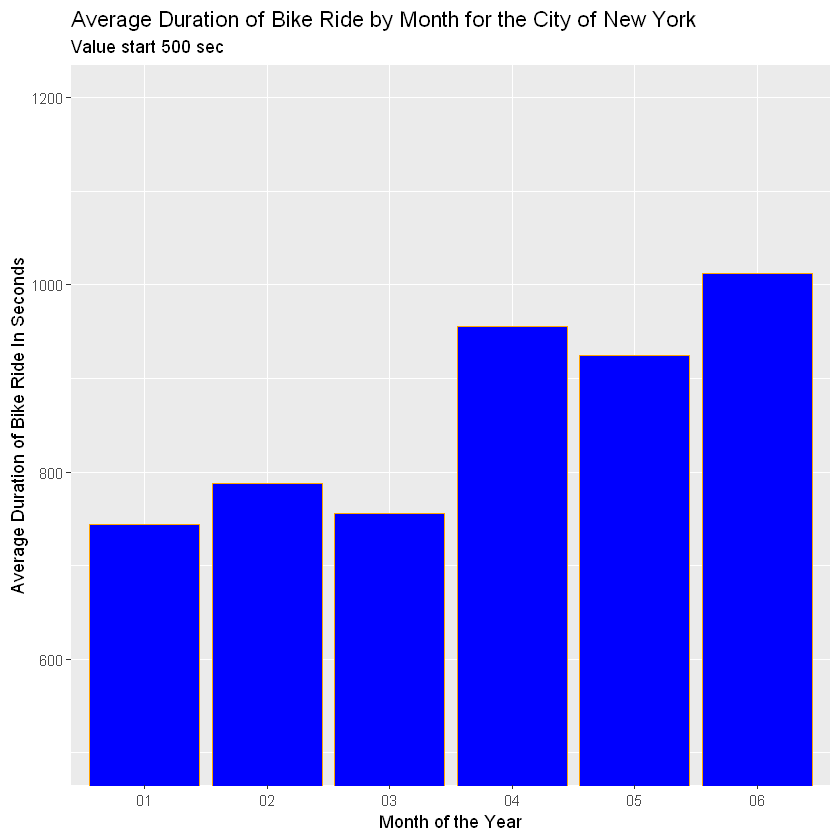

In [9]:
ggplot(data = ny, aes(x = month, y = Trip.Duration)) +
    geom_bar(position = 'dodge', stat = 'summary', fun.y = 'mean', color = 'orange', fill = 'blue') +
    xlab('Month of the Year') +
    ylab('Average Duration of Bike Ride In Seconds') +
    ggtitle('Average Duration of Bike Ride by Month for the City of New York', 'Value start 500 sec') +
    coord_cartesian(ylim = c(500,1200))
    

### Chigago

In [10]:
# summary data for Chigago trip duration by month
by(chg$Trip.Duration, chg$month, summary)
    

chg$month: 01
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0   312.0   497.0   679.8   804.0 85408.0 
------------------------------------------------------------ 
chg$month: 02
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0   345.0   577.0   826.5   976.0 85742.0 
------------------------------------------------------------ 
chg$month: 03
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0   327.0   527.0   707.6   863.0 78287.0 
------------------------------------------------------------ 
chg$month: 04
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0   400.0   697.0   981.4  1178.0 85987.0 
------------------------------------------------------------ 
chg$month: 05
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0   414.0   709.0   976.3  1183.0 82654.0 
------------------------------------------------------------ 
chg$month: 06
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     60     454     772    1047    1251   86224 

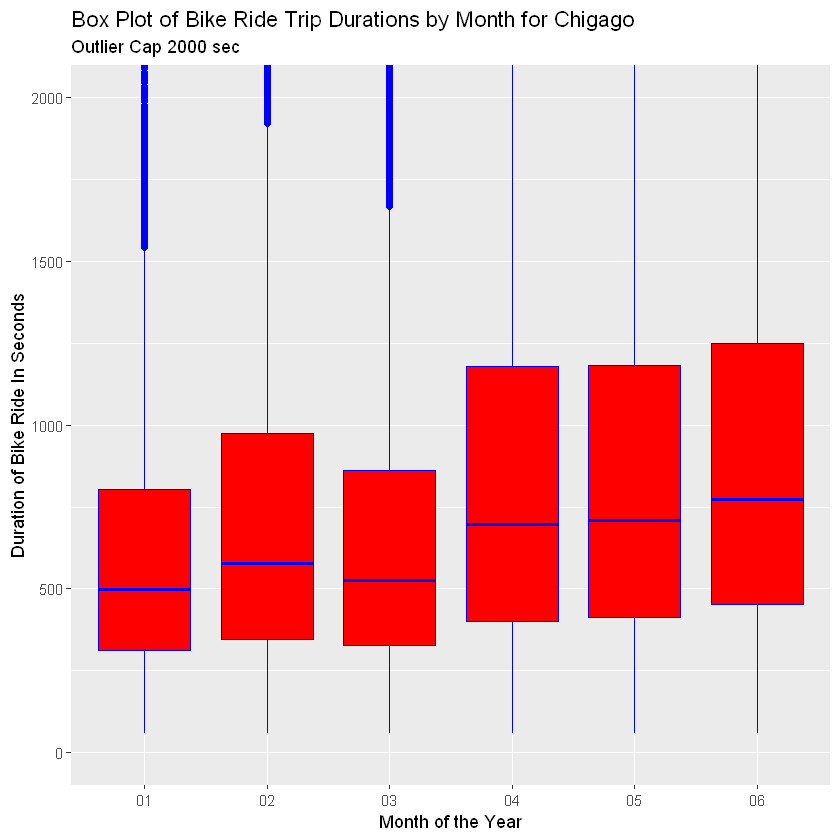

In [11]:
qplot(x = month,
      y = Trip.Duration,
      data = chg,
      geom = 'boxplot',
      xlab = 'Month of the Year',
      ylab = 'Duration of Bike Ride In Seconds',
      fill=I("red"),
      col=I("blue")) +
     coord_cartesian(ylim = c(0,2000)) +
    ggtitle('Box Plot of Bike Ride Trip Durations by Month for Chigago', 'Outlier Cap 2000 sec')

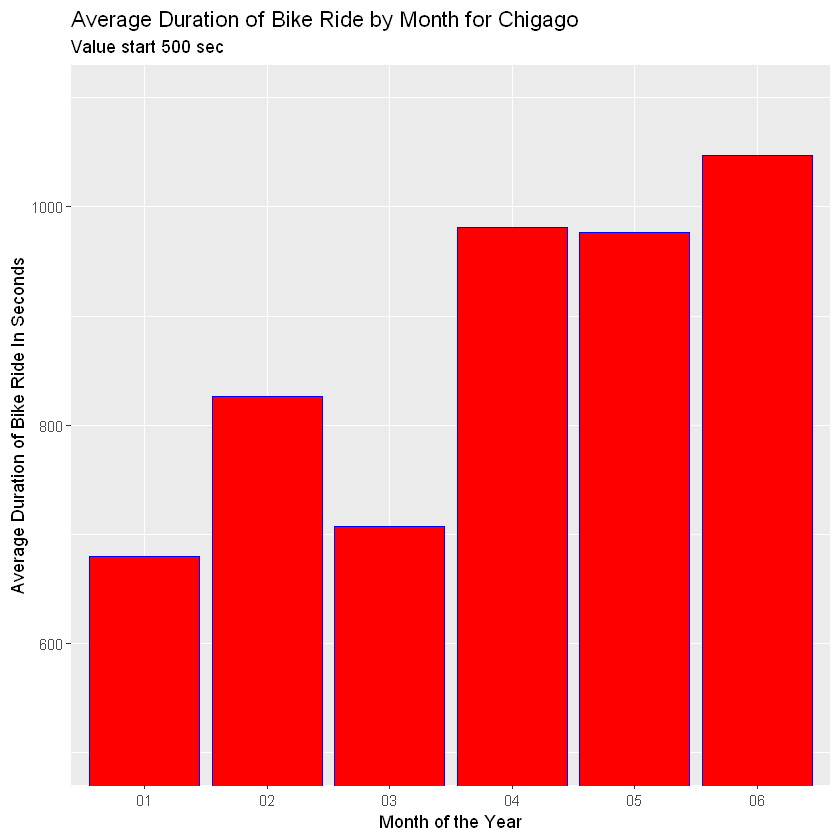

In [12]:
ggplot(data = chg, aes(x = month, y = Trip.Duration)) +
    geom_bar(position = 'dodge', stat = 'summary', fun.y = 'mean', color = 'blue', fill = 'red') +
    xlab('Month of the Year') +
    ylab('Average Duration of Bike Ride In Seconds') +
    ggtitle('Average Duration of Bike Ride by Month for Chigago', 'Value start 500 sec') +
    coord_cartesian(ylim = c(500,1100))

### Washington D.C.

In [13]:
# summary data for Washingtom DC trip duration by month
by(wa$Trip.Duration, wa$month, summary)

wa$month: 01
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   60.19   353.77   579.64   896.69   956.57 86036.27 
------------------------------------------------------------ 
wa$month: 02
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   60.12   380.12   639.17  1051.16  1098.26 84499.79 
------------------------------------------------------------ 
wa$month: 03
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   60.13   384.24   649.40  1062.88  1120.69 85980.18 
------------------------------------------------------------ 
wa$month: 04
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    60.3    448.5    794.9   1421.0   1405.7 438855.4 
------------------------------------------------------------ 
wa$month: 05
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    60.0    424.8    735.9   1309.0   1274.6 885567.6 
------------------------------------------------------------ 
wa$month: 06
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 

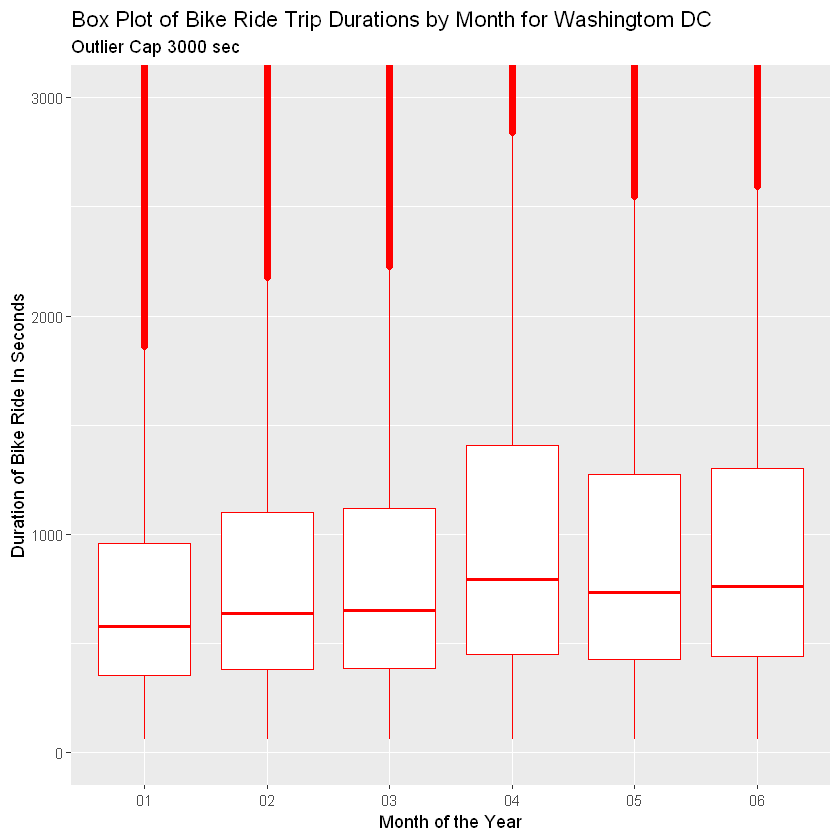

In [14]:
qplot(x = month,
      y = Trip.Duration,
      data = wa,
      geom = 'boxplot',
      xlab = 'Month of the Year',
      ylab = 'Duration of Bike Ride In Seconds',
      fill=I("white"),
      col=I("red")) +
     coord_cartesian(ylim = c(0,3000)) +
    ggtitle('Box Plot of Bike Ride Trip Durations by Month for Washingtom DC', 'Outlier Cap 3000 sec')

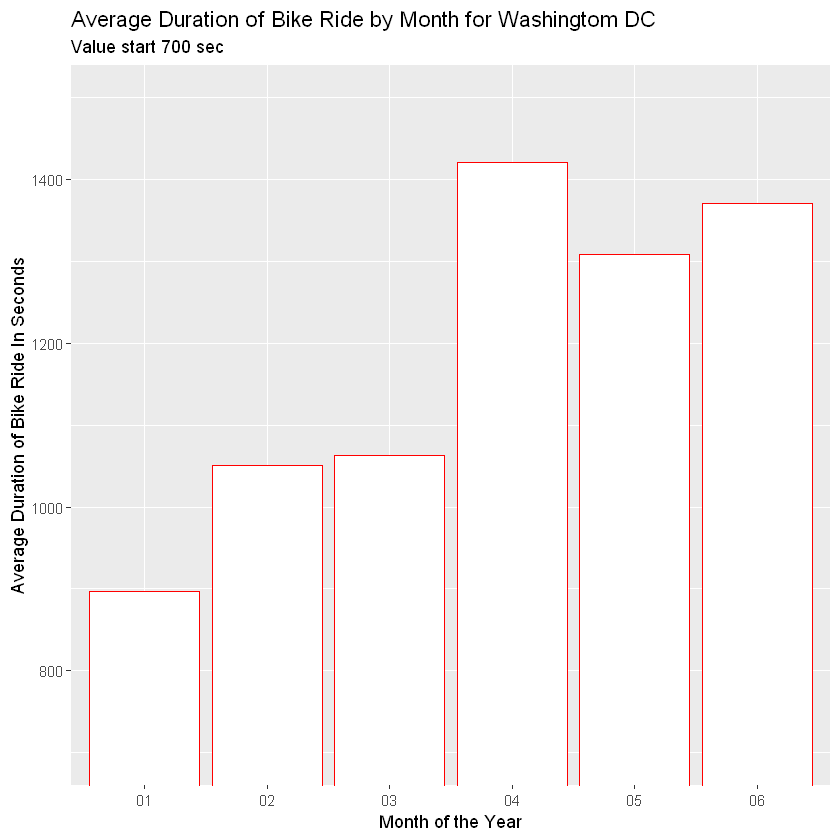

In [15]:
ggplot(data = wa, aes(x = month, y = Trip.Duration)) +
    geom_bar(position = 'dodge', stat = 'summary', fun.y = 'mean', color = 'red', fill = 'white') +
    xlab('Month of the Year') +
    ylab('Average Duration of Bike Ride In Seconds') +
    ggtitle('Average Duration of Bike Ride by Month for Washingtom DC', 'Value start 700 sec') +
    coord_cartesian(ylim = c(700,1500))

___
**The summary data and graphs definatly show a growing pattern in trip duration as the months grow warmer. The trip duaration greatly leaps from March to April. June has the highest average duration for Chigago and New York city. Washinton DC is further south than Chigago and New York city, and is most pleasent weather to ride bikes may be in april before the summer heat sets in.**

**I noticed similer trends among the cities. With New York city and Chigago, February created a peak in the winter months. Washington does not have the peek because march's averge is higher than February.**

**After the great leap in April, all the cities have a slight drop for the month of May. I am not entirely sure why this is, but it could be because Mother's day is not exactly known for bike riding, and most people I know go camping aroung Memorial day, away from the city.**

### Question 2


**Why does February average duration jump compared to most of the winter months?.**

In [16]:
# select February data and then compute day of month column from Start Time

ny.feb <- subset(ny, (month == '02'), select = c(Start.Time, Trip.Duration))
ny.feb$day = format(as.Date(ny.feb$Start.Time), '%d')

chg.feb <- subset(chg, (month == '02'), select = c(Start.Time, Trip.Duration))
chg.feb$day = format(as.Date(chg.feb$Start.Time), '%d')

wa.feb <- subset(wa, (month == '02'), select = c(Start.Time, Trip.Duration))
wa.feb$day = format(as.Date(wa.feb$Start.Time), '%d')

### New York city

In [17]:
# summary stats for trip duration New York city
by(ny.feb$Trip.Duration, ny.feb$day, summary)

ny.feb$day: 01
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   61.0   334.0   509.0   692.1   831.8 64857.0 
------------------------------------------------------------ 
ny.feb$day: 02
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     62     333     518     692     835   25623 
------------------------------------------------------------ 
ny.feb$day: 03
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   64.0   331.2   518.0   669.1   834.2  9141.0 
------------------------------------------------------------ 
ny.feb$day: 04
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   61.0   311.2   506.5   727.7   829.8 21880.0 
------------------------------------------------------------ 
ny.feb$day: 05
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    64.0    311.0    506.0    937.3    848.2 245100.0 
------------------------------------------------------------ 
ny.feb$day: 06
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   66.0   334.0   521.5   670.7   846.2  6772.0 


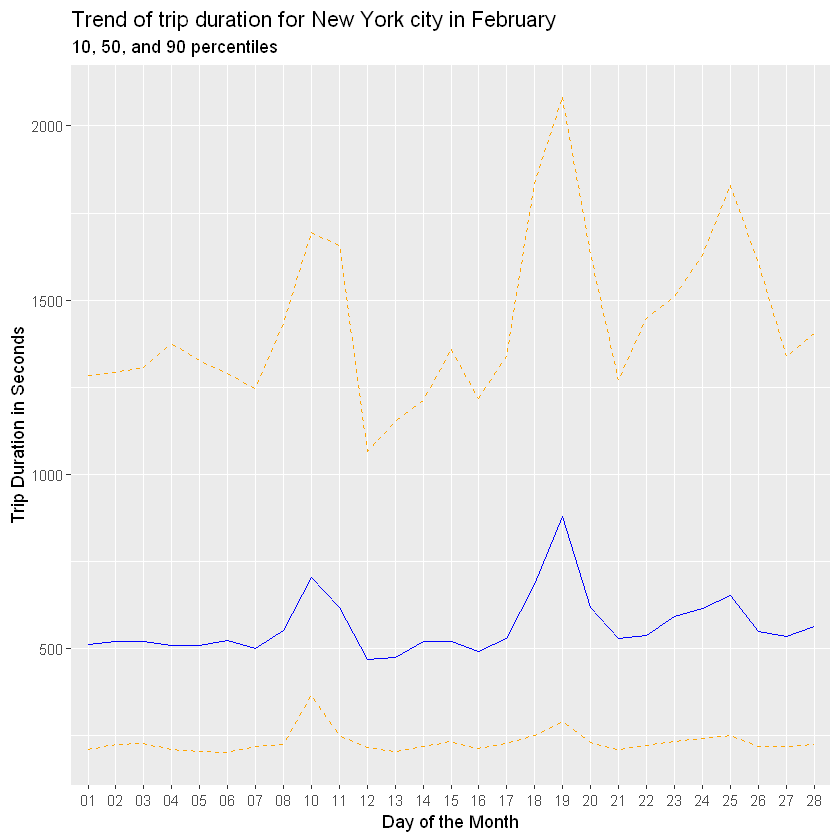

In [18]:
ggplot(ny.feb, aes(x = day, y = Trip.Duration, group = 1)) +
    #geom_point() +
    geom_line(stat = 'summary', fun.y = quantile, fun.args = list(probs = .1), linetype = 2, color = 'Orange') +
    geom_line(stat = 'summary', fun.y = quantile, fun.args = list(probs = .5), color = 'blue') +
    geom_line(stat = 'summary', fun.y = quantile, fun.args = list(probs = .9), linetype = 2, color = 'Orange') +
    xlab('Day of the Month') +
    ylab('Trip Duration in Seconds') +
    ggtitle('Trend of trip duration for New York city in February', '10, 50, and 90 percentiles')

### Chicago

In [19]:
# summary stats for trip duration Chicago
by(chg.feb$Trip.Duration, chg.feb$day, summary)

chg.feb$day: 01
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   70.0   306.2   478.5   643.9   757.2 44270.0 
------------------------------------------------------------ 
chg.feb$day: 02
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  103.0   292.0   451.0   596.4   701.0 32881.0 
------------------------------------------------------------ 
chg.feb$day: 03
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0   285.0   441.5   572.5   679.2 22808.0 
------------------------------------------------------------ 
chg.feb$day: 04
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   92.0   303.5   473.0   769.3   741.0 61058.0 
------------------------------------------------------------ 
chg.feb$day: 05
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   68.0   318.8   541.0   734.8   912.2 17146.0 
------------------------------------------------------------ 
chg.feb$day: 06
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   66.0   319.2   511.0   754.8   804.8 73536.0 
------

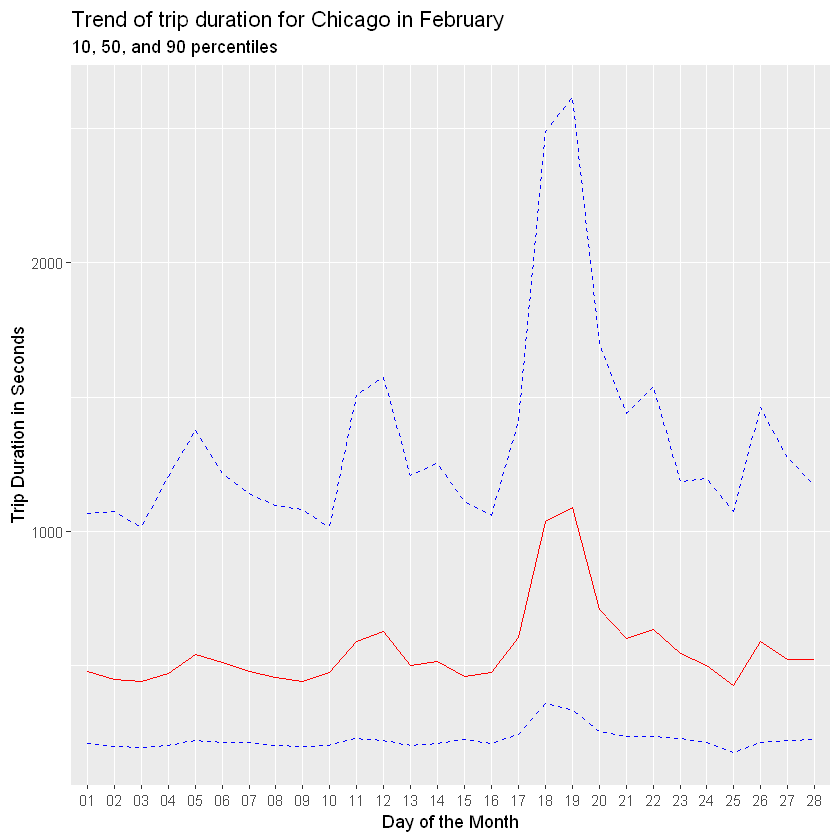

In [20]:
ggplot(chg.feb, aes(x = day, y = Trip.Duration, group = 1)) +
    #geom_point() +
    geom_line(stat = 'summary', fun.y = quantile, fun.args = list(probs = .1), linetype = 2, color = 'blue') +
    geom_line(stat = 'summary', fun.y = quantile, fun.args = list(probs = .5), color = 'red') +
    geom_line(stat = 'summary', fun.y = quantile, fun.args = list(probs = .9), linetype = 2, color = 'blue') +
    xlab('Day of the Month') +
    ylab('Trip Duration in Seconds') +
    ggtitle('Trend of trip duration for Chicago in February', '10, 50, and 90 percentiles')

In [21]:
# summary stats for trip duration Chicago
by(wa.feb$Trip.Duration, wa.feb$day, summary)

wa.feb$day: 01
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  68.07  328.50  527.06  660.33  827.12 9670.54 
------------------------------------------------------------ 
wa.feb$day: 02
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   72.93   345.48   535.97   700.87   862.97 15783.44 
------------------------------------------------------------ 
wa.feb$day: 03
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   64.82   343.10   542.56   673.25   836.51 10685.41 
------------------------------------------------------------ 
wa.feb$day: 04
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   60.61   359.94   591.93  1000.41   977.36 65619.71 
------------------------------------------------------------ 
wa.feb$day: 05
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   70.46   332.32   555.33   892.28   979.64 27171.96 
------------------------------------------------------------ 
wa.feb$day: 06
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   63.9

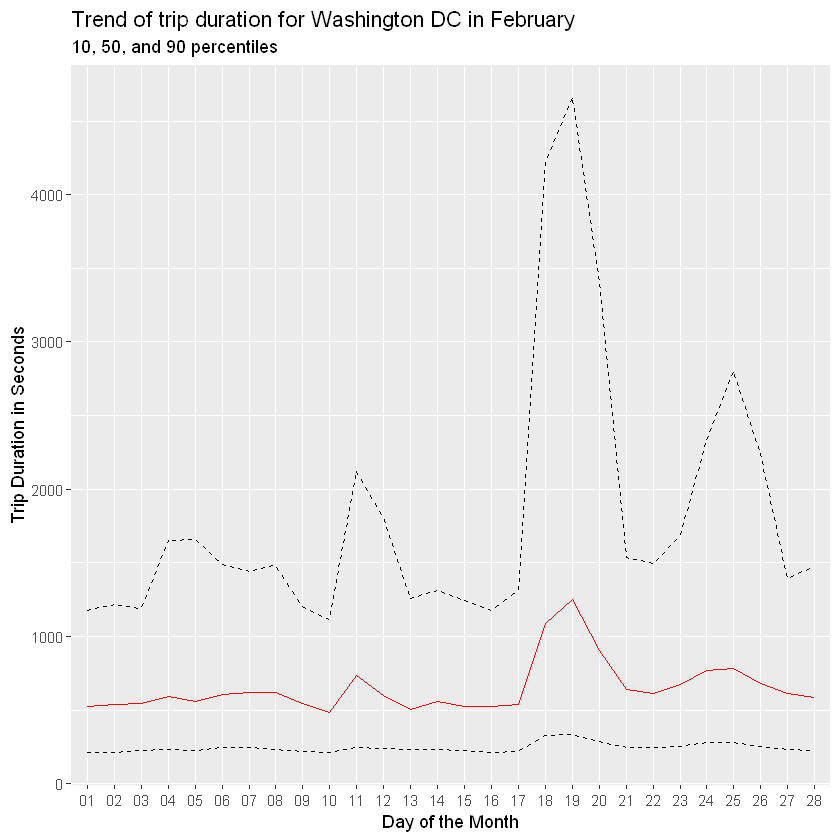

In [22]:
ggplot(wa.feb, aes(x = day, y = Trip.Duration, group = 1)) +
    #geom_point() +
    geom_line(stat = 'summary', fun.y = quantile, fun.args = list(probs = .1), linetype = 2) +
    geom_line(stat = 'summary', fun.y = quantile, fun.args = list(probs = .5), color = 'red') +
    geom_line(stat = 'summary', fun.y = quantile, fun.args = list(probs = .9), linetype = 2) +
    xlab('Day of the Month') +
    ylab('Trip Duration in Seconds') +
    ggtitle('Trend of trip duration for Washington DC in February', '10, 50, and 90 percentiles')

---
**I initialy thought that St. Valentine's Day was the factor that was giving February the peak in the average duration in the winter months. But, as seen from the summaries and the plots, that is not the case. Here is seems to be President's day weekend that is creating the peak.**

### Question 3


**What is the *User Type* count?**

### New York

In [23]:
# user type count New York city
summary(ny$User.Type)

Customer Subscriber 
       692      30159     269149

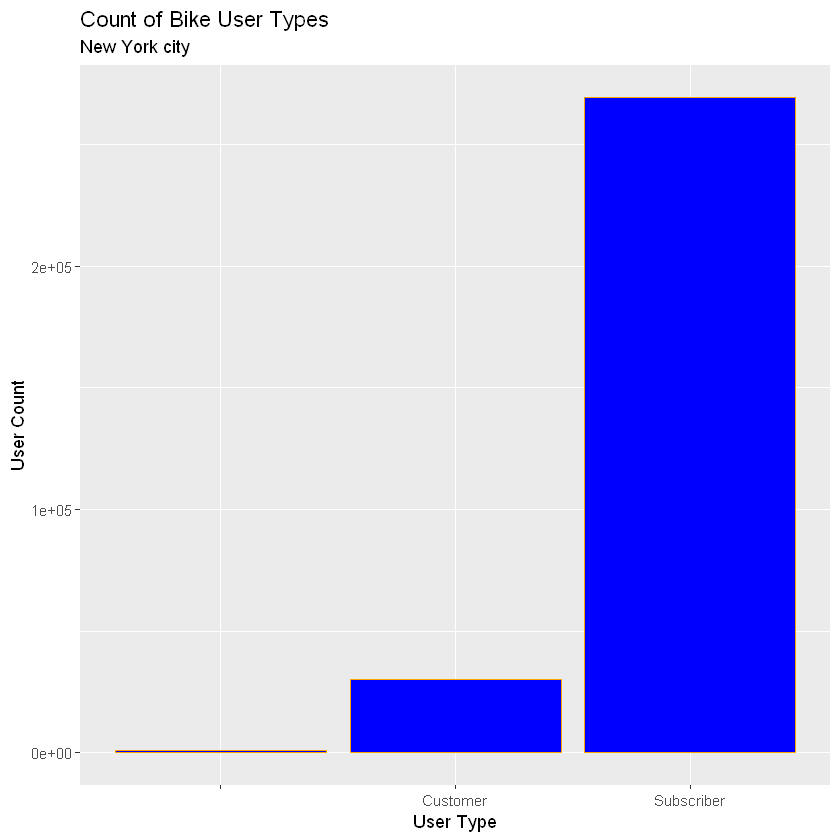

In [24]:
ggplot(ny, aes(User.Type)) +
    geom_bar(color = 'orange', fill = 'blue') +
    xlab('User Type') +
    ylab('User Count') +
    ggtitle('Count of Bike User Types', 'New York city')

### Chicago

In [25]:
# user type count Chicago
summary(chg$User.Type)

Customer  Dependent Subscriber 
     61110          1     238889

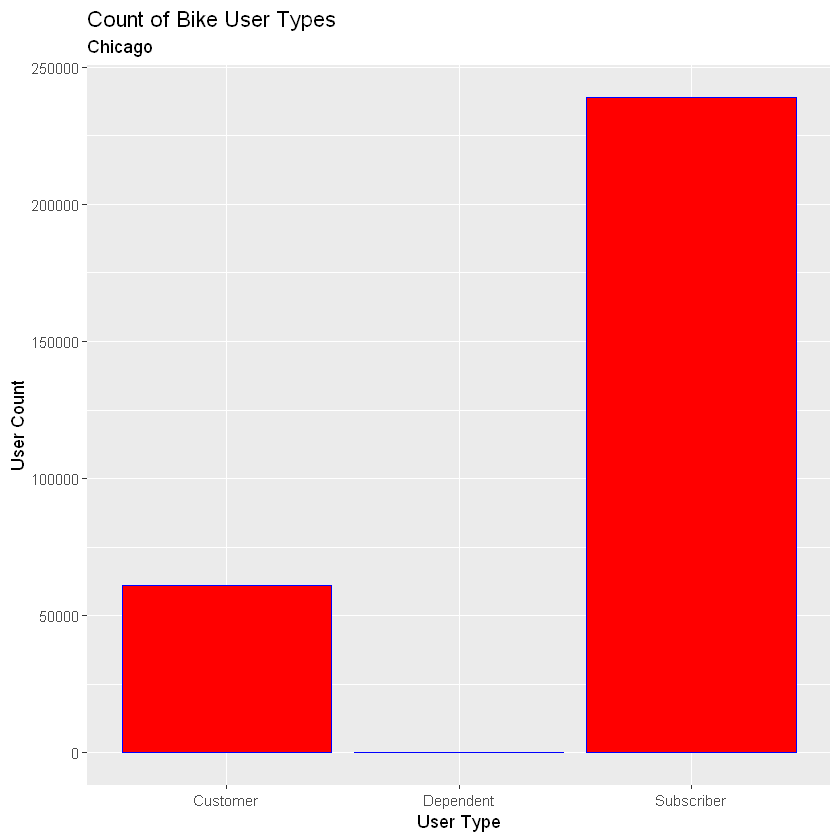

In [26]:
ggplot(chg, aes(User.Type)) +
    geom_bar(color = 'blue', fill = 'red') +
    xlab('User Type') +
    ylab('User Count') +
    ggtitle('Count of Bike User Types', 'Chicago')

### Washington DC

In [27]:
# user type count Washington DC
summary(wa$User.Type)

Customer Subscriber 
     79214     220786

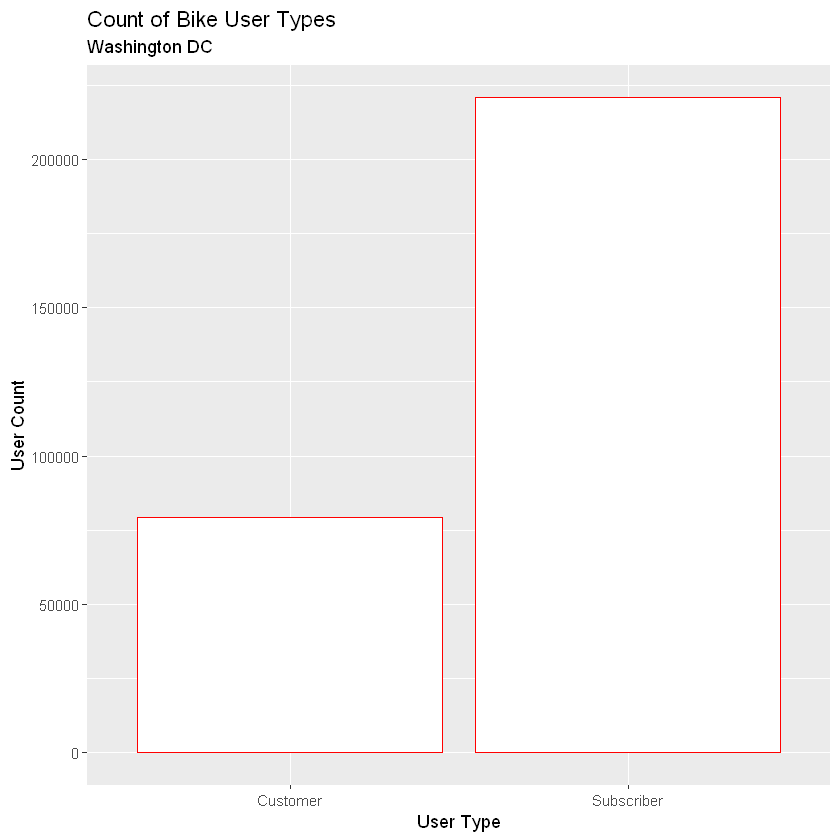

In [28]:
ggplot(wa, aes(User.Type)) +
    geom_bar(color = 'red', fill = 'white') +
    xlab('User Type') +
    ylab('User Count') +
    ggtitle('Count of Bike User Types', 'Washington DC')

___
**The summary fuctions clearly answer the *User Type* count question.**
> **New York**
>>Customer:    30,159  users  
>>Subscriber: 269,149 users 

>**Chicago**
>>Customer:    61,110 users   
>>Subscriber: 238,889 users 

>**Washington**
>>Customer:    79,214 users  
>>Subscriber: 220,786 users

**The majority of users are subcribers. Of all the cities, from the graphs, Washington DC seems to have the highest proportion of general customers to subscribers.**